<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_Data-AI/blob/master/Copy_of_MidTermPart2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# You need to mount your google drive  to the /content/gdrive folder of your virtual computer
# located in the colab server

from google.colab import drive
drive.mount("/content/gdrive")
#drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [3]:
from fastai.vision import *

## Get a list of URLs

### Search and scroll

Question 1: (1.1) Please download 3 categories of animal images from google. Download about 100 images for each category. 

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Question 1 (1.2) Move the downloaded files to your google dirve and make the names of the files in the form of *.csv.

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

In Google Chrome press <kbd>Ctrl</kbd><kbd>+Shift</kbd><kbd>+j</kbd> on Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>j</kbd> on macOS, and a small window the javascript 'Console' will appear. In Firefox press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>k</kbd> on Windows/Linux or <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>k</kbd> on macOS. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. Before running the following commands, you may want to disable ad blocking extensions (uBlock, AdBlockPlus etc.) in Chrome. Otherwise the window.open() command doesn't work. Then you can run the following commands:

```javascript
urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### upload urls file into /content folder

You will need to run this cell once per each category. The following is an illustration.

In [4]:
path = Path('gdrive/My Drive/fastai-v3/data/animals')


## Download images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.  The following is an illustration.

In [5]:
classes = ['deer','giraffe','koala']

In [6]:
# For example, Do this when download "urls_black.csv' file:
folder = 'deer'
dest = path/folder
file = 'deer.csv'
download_images(dest/file, dest, max_pics=100)
# Question 2: Explain what happens when you execute download_images() statement.
#it downloads the pictures from a particular category to that folder.
#in this case, butterfly pictures from the URLs contained in the butterfly.csv file



In [8]:
# For example, Do this when download "urls_black.csv' file:
folder = 'giraffe'
dest = path/folder
file = 'giraffe.csv'
download_images(dest/file, dest, max_pics=100)

In [9]:
# For example, Do this when download "urls_black.csv' file:
folder = 'koala'
dest = path/folder
file = 'koala.csv'
download_images(dest/file, dest, max_pics=100)

In [15]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

deer


giraffe


koala


## View data

Answer to question 3:
The used method for constructing the datasets depends on how the downloaded original dataset is organized. Why do we use from_folder() method in this notebook?

If we used a dataset from Kaggle or from an academic dataset, there would probably be folders called train, valid, and test containing these datasets.
In this case, we just grabbed images from Google, so we don't have a separate validation set.
To create a proper data bunch, we will use the from_folder() method to create the training set using data in the current folder and set aside 20% of the data to create a validation set randomly.

What it is used in the function ImageDataBunch:

valid_pct=0.2: validation percentage, in this case we are setting aside 20% of this folder's data to create a validation set automatically and randomly.

ds_tfm: transforms, "ds_tfms=get_transforms(), size=224" is to make something size 224.

size=224: what size images do you want to work with. It makes all of our data the same size, in this case a square image of 224*224.

bs: batch size (i.e. number of images processed at a time) . The default bs=64 in ImageDataBunch.create(). Set to 16 if memory is not enough.

In [17]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats) 
        


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Good! Let's take a look at some of our pictures then.

## Train model

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
# Question 4: 4.1) cnn_learner() has input paramters other than the shown above.
# One of them is pretrained, which is True by default when you do not specify it. 
# What happens when you specify pretrained=True as in 
# learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [20]:
learn.fit_one_cycle(4)


epoch,train_loss,valid_loss,error_rate,time
0,1.787812,0.609149,0.233333,00:04
1,0.975840,0.065073,0.016667,00:03
2,0.650587,0.026229,0.016667,00:03
3,0.488606,0.021685,0.016667,00:03


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3000: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and uses scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample wi

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

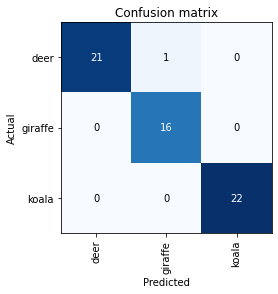

In [22]:
interp.plot_confusion_matrix()
# Question 5: What does your confusion matrix tell you about the prediction capability of your neural network?
# Explain in a conscise manner but do not omit important points.
#The confusion matrix shows for every actual type of animal, how many times the  
#predicted to be that animal. The diagonal basically shows how many times the model 
#predicted correctly, which in this case is most of the time.


In [ ]:
#Question 6: use interp.plot_top_losses() to find out the prediction capability of your neural network?
# Explain in a conscise manner but do not omit important points.
#Below we can see the particular combinations of predicted class and actual class 
#that the model got. The title of this image shows: prediction, actual, 
#loss, probability of actual class. For example the first one
#It means the computer predictet that image to be class "giraffe" 
#but the picture's real label is "deer". It has been wrongly classified 
#1.06 times, and the probability the model 
#assignend to the this image of being it's actual class (sain_bernard) is 0.35.





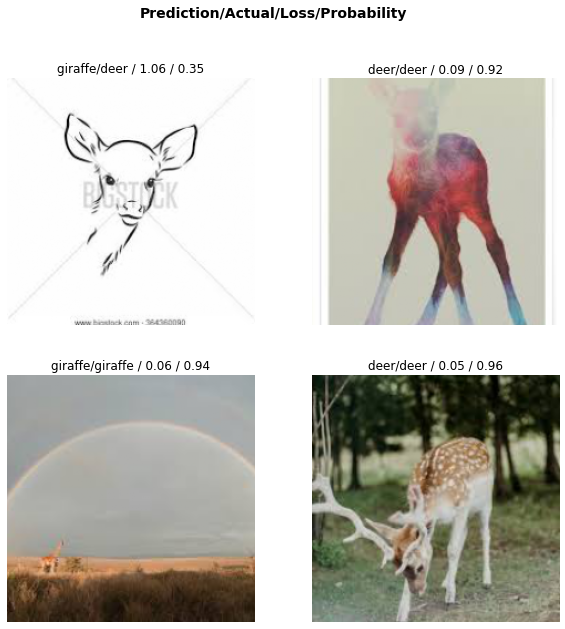

In [25]:
interp.plot_top_losses(4, figsize=(10,10))
